# Preprocessing

On effectue ici le même preprocessing que précedement.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, confusion_matrix, classification_report


In [2]:
header = ["id", "age", "gender", "education", "country", "ethnicity", "neuroticism", "extraversion", \
          "openness", "agreeableness", "conscientiousness", "impulsiveness", "sensation_seeking", \
          "alcohol", "amphet", "amyl", "benzos", "caff", "cannabis", "choc", "coke", "crack", "ecstasy", \
          "heroin", "ketamine", "legallh", "lsd", "meth", "mushroom", "nicotine", "semer", "vsa"]

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data", names=header)
df

,id,age,gender,education,country,ethnicity,neuroticism,extraversion,openness,agreeableness,...,ecstasy,heroin,ketamine,legallh,lsd,meth,mushroom,nicotine,semer,vsa
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [3]:
age = {
    -0.95197: "18-24",
    -0.07854: "25-34",
    0.49788: "35-44",
    1.09449: "45-54",
    1.82213: "55-64",
    2.59171: "65+",
}
gender = {-0.48246: "male", 0.48246: "female"}
education = {
    -2.43591: "left school before 16",
    -1.7379: "left school at 16",
    -1.43719: "left school at 17",
    -1.22751: "left school at 18",
    -0.61113: "left college without degree",
    -0.05921: "professionnal certificate",
    0.45468: "university degree",
    1.16365: "master degree",
    1.98437: "doctorate degree",
}
country = {
    -0.57009: "USA",
    -0.46841: "New Zealand",
    -0.28519: "Other",
    -0.09765: "Australia",
    0.21128: "Republic of Ireland",
    0.24923: "Canada",
    0.96082 : "UK",
}

ethnicity = {
  -0.50212: "Asian",
  -1.10702: "Black",
  1.90725 : "Mixed-Black/Asian",
  0.11440: "Other",
  -0.31685: "White",
  0.12600: "Mixed-White/Asian",
  -0.22166: "Mixed-White/Black",
}

In [4]:
def map_values(df):
  df["age"] = df["age"].map(age)
  df["gender"] = df["gender"].map(gender)
  df["education"] = df["education"].map(education)
  df["country"] = df["country"].map(country)
  df["ethnicity"] = df["ethnicity"].map(ethnicity)
  return df
df_mapped = map_values(df.copy()).copy()
df_mapped

,id,age,gender,education,country,ethnicity,neuroticism,extraversion,openness,agreeableness,...,ecstasy,heroin,ketamine,legallh,lsd,meth,mushroom,nicotine,semer,vsa
0,1,35-44,female,professionnal certificate,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,male,doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,male,professionnal certificate,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,female,master degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,female,doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,18-24,female,left college without degree,USA,White,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,18-24,male,left college without degree,USA,White,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,25-34,female,university degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,18-24,female,left college without degree,USA,White,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [5]:
df_cannabis = df_mapped[["age", "gender", "education", "country", "neuroticism", "extraversion", \
          "openness", "agreeableness", "conscientiousness", "impulsiveness", "sensation_seeking", \
          "cannabis"]]
# On ne garde pas ethnicity
df_cannabis

,age,gender,education,country,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation_seeking,cannabis
0,35-44,female,professionnal certificate,UK,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL0
1,25-34,male,doctorate degree,UK,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL4
2,35-44,male,professionnal certificate,UK,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL3
3,18-24,female,master degree,UK,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL2
4,35-44,female,doctorate degree,UK,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL3
...,...,...,...,...,...,...,...,...,...,...,...,...
1880,18-24,female,left college without degree,USA,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5
1881,18-24,male,left college without degree,USA,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL3
1882,25-34,female,university degree,USA,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL6
1883,18-24,female,left college without degree,USA,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL6


In [6]:
def CL_to_binary_class(cl):
    if(cl=="CL0" or cl=="CL1" or cl=="CL2"):
        return 0
    else:
        return 1

# Analyse plus avancé des données

Après n'avoir pas réussi à obtenir de meilleur résultat avec notre premier model, nous avons réalisé de nouvelles analyses des données.

Voici d'abord une matrice de corrélation nous permettant de voir que la plupart des résultat des tests psychologiques n'étaient que peu corrélés entre eux. Les plus importantes corrélations étaient entre l'impulsivité et la recherche de sensation ainsi que entre l'ouverture à l'expérience et la recherche de sensation. On peut aussi voir que le névrosisme et l'extraversion était plutôt inversement corréler.

In [7]:
df_cannabis.corr().style.background_gradient(cmap="coolwarm")

,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation_seeking
neuroticism,1.000000,-0.431051,0.010177,-0.216964,-0.391088,0.174399,0.079988
extraversion,-0.431051,1.000000,0.245277,0.157336,0.308024,0.114151,0.210130
openness,0.010177,0.245277,1.000000,0.038516,-0.056811,0.277512,0.421709
agreeableness,-0.216964,0.157336,0.038516,1.000000,0.247482,-0.229690,-0.208061
conscientiousness,-0.391088,0.308024,-0.056811,0.247482,1.000000,-0.335133,-0.229038
impulsiveness,0.174399,0.114151,0.277512,-0.229690,-0.335133,1.000000,0.623120
sensation_seeking,0.079988,0.210130,0.421709,-0.208061,-0.229038,0.623120,1.000000


In [8]:
df_cannabis["cannabis"] = df_cannabis["cannabis"].apply(CL_to_binary_class)
df_cannabis

/tmp/ipykernel_25600/3732393021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cannabis["cannabis"] = df_cannabis["cannabis"].apply(CL_to_binary_class)


,age,gender,education,country,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation_seeking,cannabis
0,35-44,female,professionnal certificate,UK,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
1,25-34,male,doctorate degree,UK,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
2,35-44,male,professionnal certificate,UK,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1
3,18-24,female,master degree,UK,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
4,35-44,female,doctorate degree,UK,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1880,18-24,female,left college without degree,USA,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1
1881,18-24,male,left college without degree,USA,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1
1882,25-34,female,university degree,USA,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1
1883,18-24,female,left college without degree,USA,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1


In [9]:
# perform one-hot encoding on categorical features
categorical_features = ['gender', 'country', 'age', 'education']
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df_cannabis[categorical_features])
df_cannabis_encoded = pd.DataFrame(enc.transform(df_cannabis[categorical_features]).toarray(), columns=enc.get_feature_names_out())

X = pd.concat([df_cannabis.drop(categorical_features, axis=1), df_cannabis_encoded], axis=1)
y = X.pop("cannabis")


Regardons maintenant la corrélation entre chacune des caractéristique et la consommation de cannabis.

<AxesSubplot:title={'center':'Correlation with the target'}>

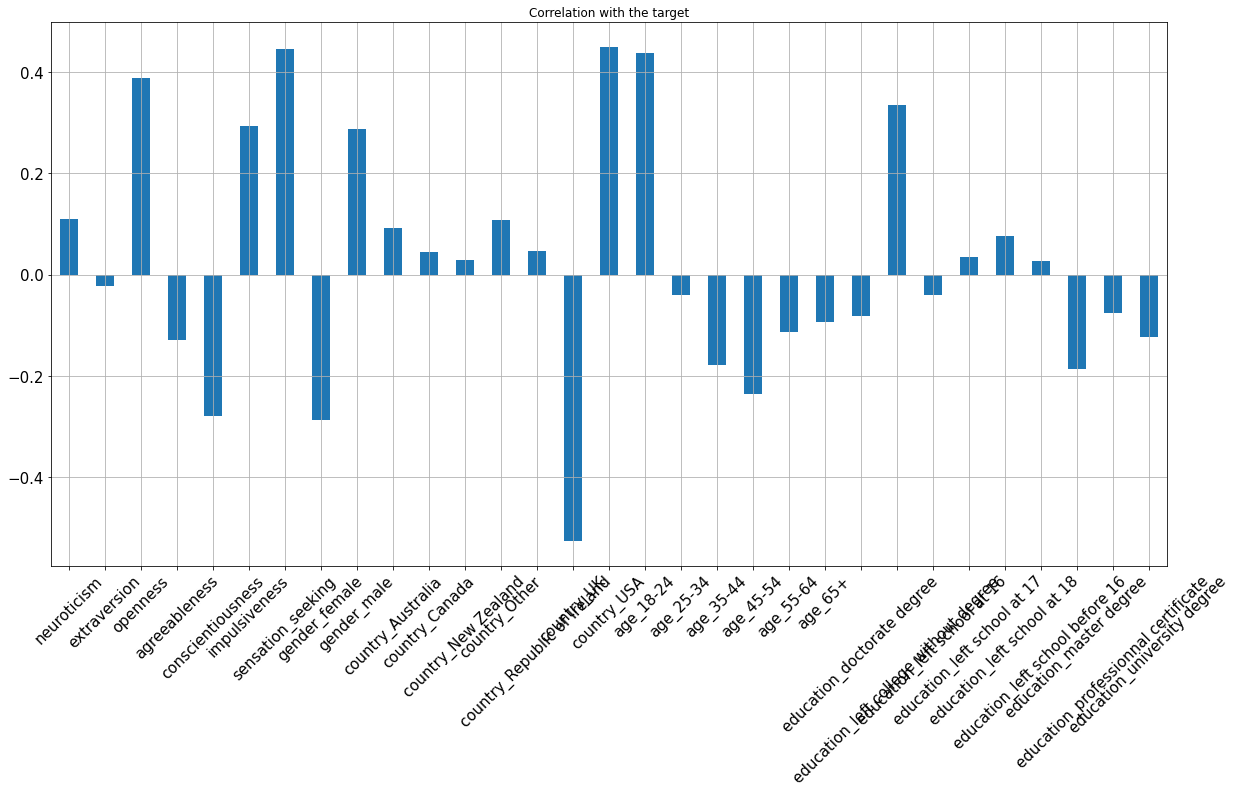

In [10]:
# correlation with the target
X.corrwith(y).plot.bar(
        figsize = (20, 10), title = "Correlation with the target", fontsize = 15,
        rot = 45, grid = True)


Ces corrélations correspondaient aux branchement que nous avions avec l'arbre de décision.

# Comparaison baselines

In [11]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_valid, y_train_valid, test_size=0.2, random_state=42
)

In [13]:
# array to compare different models
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))
models.append(("RF", RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = "accuracy"
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(
        model, X_train, y_train, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print(cv_results)

LR: 0.822603 (0.043129)
[0.85950413 0.7768595  0.72727273 0.85123967 0.79338843 0.8677686
 0.84166667 0.825      0.81666667 0.86666667]
KNN: 0.805978 (0.039891)
[0.83471074 0.80165289 0.72727273 0.78512397 0.80991736 0.8677686
 0.78333333 0.79166667 0.79166667 0.86666667]
CART: 0.752128 (0.030080)
[0.75206612 0.72727273 0.73553719 0.73553719 0.72727273 0.76859504
 0.71666667 0.81666667 0.79166667 0.75      ]
NB: 0.745530 (0.047920)
[0.76859504 0.78512397 0.68595041 0.71900826 0.68595041 0.71900826
 0.71666667 0.81666667 0.73333333 0.825     ]
SVM: 0.822610 (0.048680)
[0.8677686  0.80165289 0.7107438  0.83471074 0.79338843 0.85950413
 0.86666667 0.8        0.80833333 0.88333333]
RF: 0.826722 (0.026954)
[0.82644628 0.80991736 0.7768595  0.83471074 0.81818182 0.8677686
 0.84166667 0.84166667 0.79166667 0.85833333]


Nous pouvons observer ci-dessous qu'utiliser un arbre de décision pour réaliser cette classification n'était pas le meilleur choix. Utiliser une random forest ou une régression logistique aurait été plus efficace.

Random Forest utilise le principe de Decision Tree dans son fonctionnement. Il va créé de nombreux arbres de décision puis faire la moyenne de chaque arbre pour parvenir à un résultat. Ceci dit, chaque arbre sera différent car les données d'entrée de chacun seront différente et que à la place de parcourir toutes les features à chaque noeud, seul une partie sera exploré. Ce modèle peut limiter l'overfitting possible du décision tree.

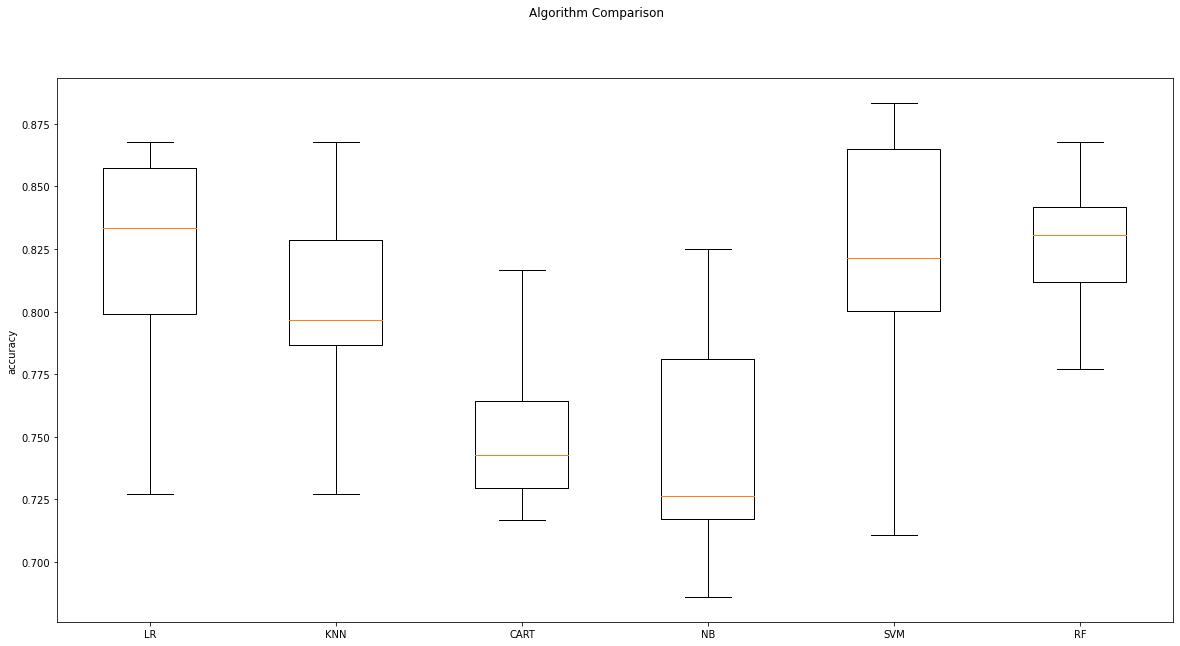

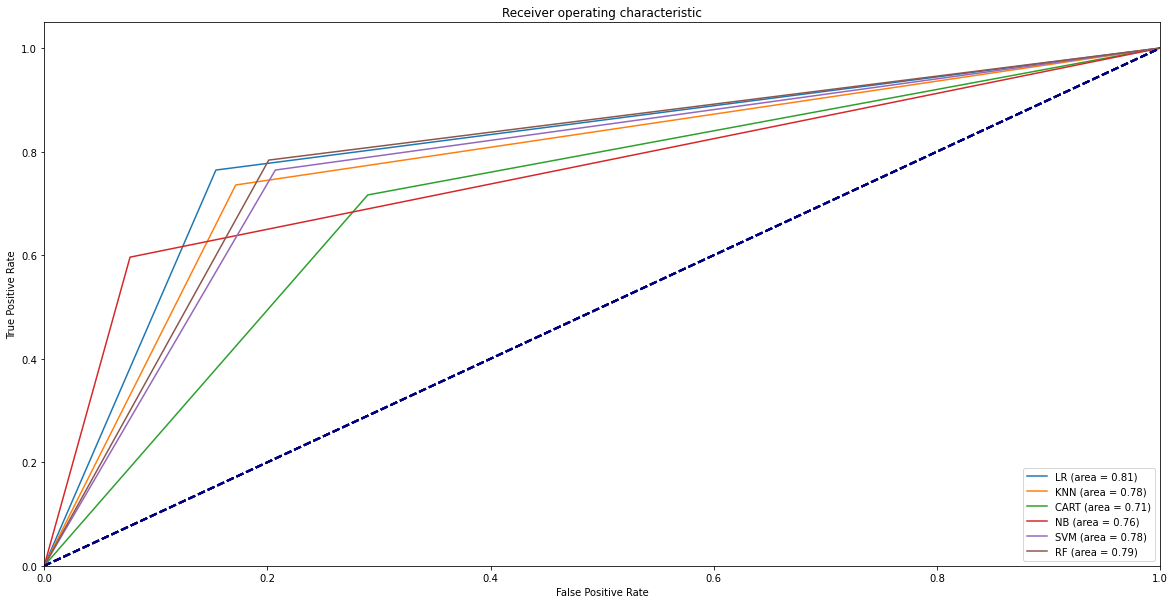

In [14]:
# boxplot algorithm comparison
figure = plt.figure(figsize=(20, 10))
figure.suptitle('Algorithm Comparison')
ax = figure.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylabel("accuracy")
plt.show()

from sklearn.metrics import roc_curve, auc
# plot the ROC curve for each model
plt.figure(figsize=(20, 10))
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (area = {roc_auc:.2f})")
    plt.legend(loc="lower right")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
plt.show()

La courbe ROC nous permet d'avoir une autre perspective sur les modèles par rapport à un modèle complètement aléatoire (en pointillé).

In [15]:
# dataframe with the results
df_results = pd.DataFrame(results)
df_results = df_results.transpose()
df_results.columns = names
df_results

# add the mean of the results for each model
df_results['mean'] = df_results.mean(axis=1)
df_results


,LR,KNN,CART,NB,SVM,RF,mean
0,0.859504,0.834711,0.752066,0.768595,0.867769,0.826446,0.818182
1,0.776860,0.801653,0.727273,0.785124,0.801653,0.809917,0.783747
2,0.727273,0.727273,0.735537,0.685950,0.710744,0.776860,0.727273
3,0.851240,0.785124,0.735537,0.719008,0.834711,0.834711,0.793388
4,0.793388,0.809917,0.727273,0.685950,0.793388,0.818182,0.771350
5,0.867769,0.867769,0.768595,0.719008,0.859504,0.867769,0.825069
6,0.841667,0.783333,0.716667,0.716667,0.866667,0.841667,0.794444
7,0.825000,0.791667,0.816667,0.816667,0.800000,0.841667,0.815278
8,0.816667,0.791667,0.791667,0.733333,0.808333,0.791667,0.788889
9,0.866667,0.866667,0.750000,0.825000,0.883333,0.858333,0.841667
